<a href="https://colab.research.google.com/github/GraceJulius/FDSFE_GJulius/blob/main/HW3/happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import missingno as msno
import pylab as pl

In [2]:
happiness=pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/happines.csv")
happiness


,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
158,Namibia,NaN,4.639,NaN,0.87900,NaN,0.47700,0.40100,0.05600,0.07000,NaN,2019


In [3]:
happiness.shape


(160, 12)

Here, we see the shape of the dataset. This dataset has 160 rows and 12 columns.


In [4]:
happiness.head(10)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


This table shows us the first 10 rows of the dataframe.

In [5]:
happiness.tail(10)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
150,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,2015
151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,2015
152,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
158,Namibia,NaN,4.639,NaN,0.87900,NaN,0.47700,0.40100,0.05600,0.07000,NaN,2019
159,Gambia,NaN,4.516,NaN,0.30800,NaN,0.42800,0.38200,0.16700,0.26900,NaN,2019


While this table shows us the last 10 rows of the dataframe.

In [6]:
happiness.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,160.000000,158.000000,160.000000,158.000000,160.000000,160.000000,160.000000,160.000000,158.000000,160.000000
mean,5.365756,0.047885,0.842979,0.991046,0.628037,0.428151,0.143023,0.236448,2.098977,2015.050000
std,1.141280,0.017146,0.402840,0.272369,0.246332,0.149803,0.119492,0.126605,0.553550,0.445805
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,4.517750,0.037268,0.539453,0.856823,0.437897,0.328630,0.061067,0.148800,1.759410,2015.000000
50%,5.203000,0.043940,0.901085,1.029510,0.695745,0.434635,0.107220,0.216130,2.095415,2015.000000
75%,6.193250,0.052300,1.155523,1.214405,0.809837,0.547057,0.179565,0.307547,2.462415,2015.000000
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2019.000000


This table shows the statistical properties of the numerical columns in the dataset.

In [7]:
happiness.isna().sum(axis=0)

,0
Country,0
Region,2
Happiness Score,0
Standard Error,2
Economy (GDP per Capita),0
Family,2
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0
Generosity,0


This shows the number of missing entries.

<Axes: >

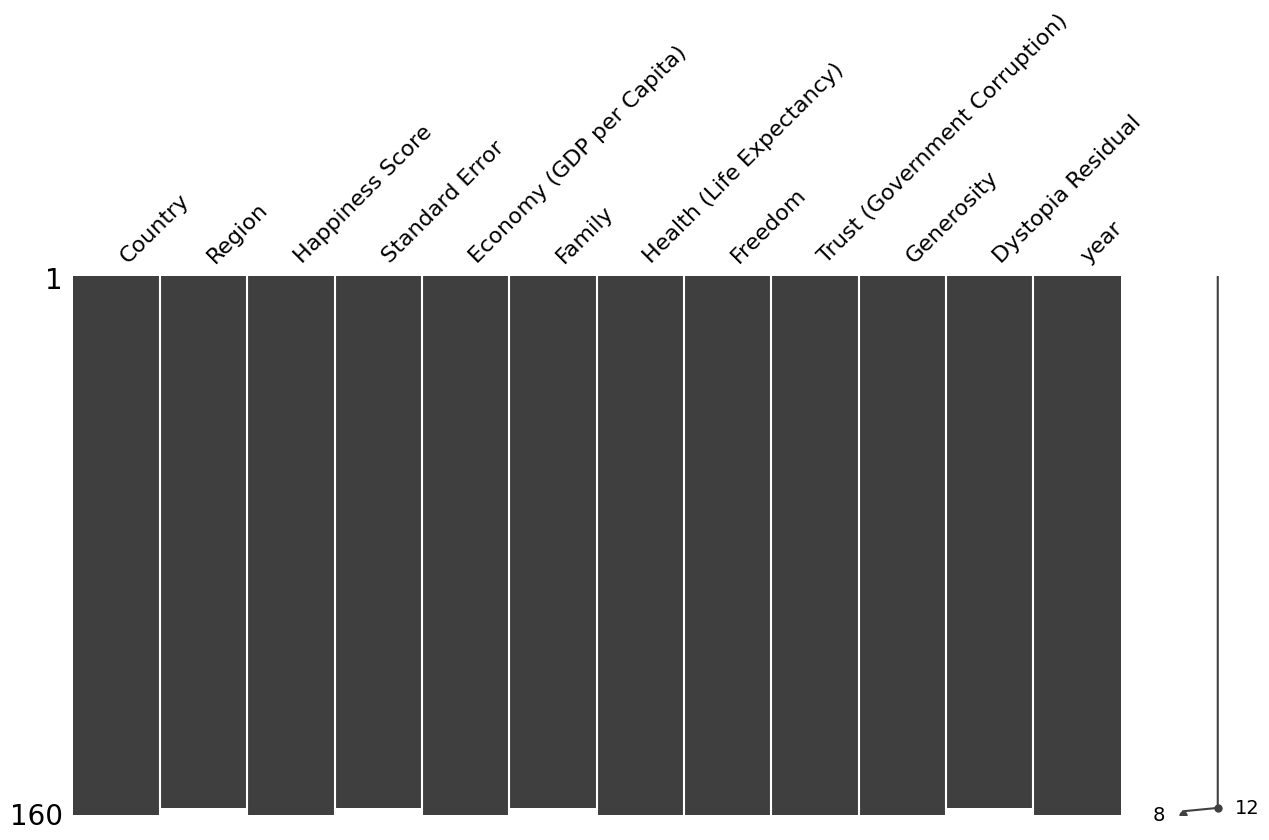

In [8]:
import missingno as msno
msno.matrix(happiness, figsize=(15,7))


This helps to visualize the missing elements in a data.
Grey shows a value that is not missing while a non grey area shows a value is missing


In [9]:
happiness.dropna(axis=0, how="any", inplace=True)

This code removes all rows from the dataset that has missing values.

In [10]:
happiness.isna().sum(axis=0)

,0
Country,0
Region,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0
Generosity,0


Checking to see if there are still missing rows

In [11]:
happiness.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,2015.0
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.0
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.0
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,2015.0
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,2015.0
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,2015.0
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2015.0


It is visible that there are not missing rows

<Axes: >

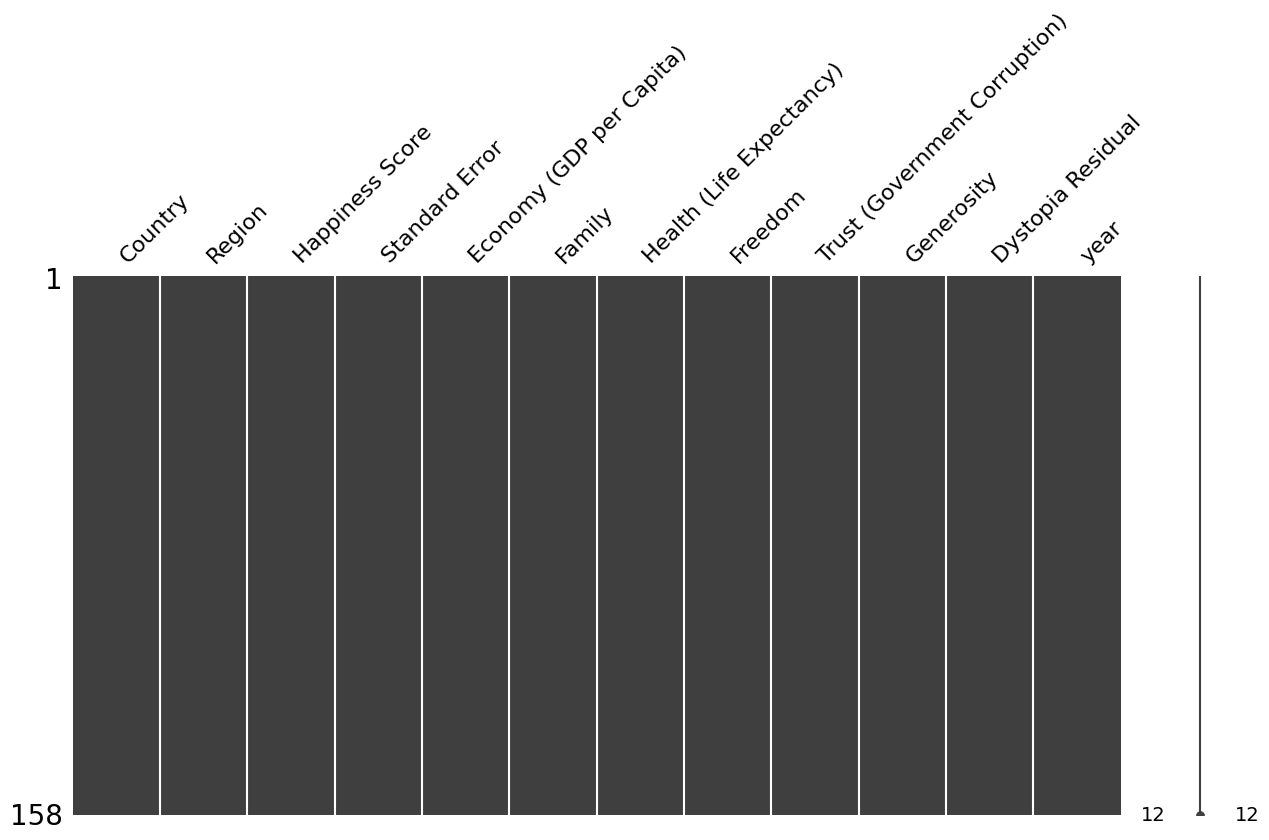

In [12]:
import missingno as msno
msno.matrix(happiness, figsize=(15,7))


This visualizes our dataset better as we can see that our graph is evenly alligned and there are no non-grey areas.

In [13]:
HappiestCountry=happiness[happiness["Happiness Score"]==happiness['Happiness Score'].max()]
HappiestCountry

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015


Switzerland is the happiest country.

In [14]:
BestEconomy=happiness[happiness["Economy (GDP per Capita)"]==happiness['Economy (GDP per Capita)'].max()]
BestEconomy


,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
27,Qatar,Middle East and Northern Africa,6.611,0.06257,1.69042,1.0786,0.79733,0.6404,0.52208,0.32573,1.55674,2015


The country with the best economy is Qatar.

In [15]:
BestFamily=happiness[happiness["Family"]==happiness['Family'].max()]
BestFamily

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201,2015


The country with the highest number of  family is Iceland.

In [16]:
BestHealth=happiness[happiness["Health (Life Expectancy)"]==happiness['Health (Life Expectancy)'].max()]
BestHealth

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
23,Singapore,Southeastern Asia,6.798,0.0378,1.52186,1.02,1.02525,0.54252,0.4921,0.31105,1.88501,2015


The country with the best health is Singapore.

In [17]:
HighFreedom=happiness[happiness["Freedom"]==happiness['Freedom'].max()]
HighFreedom

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
3,Norway,Western Europe,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015


The country with the highest number of freedom is Norway.

In [18]:
HighTrust=happiness[happiness["Trust (Government Corruption)"]==happiness['Trust (Government Corruption)'].max()]
HighTrust

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042,2015


The country at the top is Rwanda.

In [19]:
BestGenerosity=happiness[happiness["Generosity"]==happiness['Generosity'].max()]
BestGenerosity

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
128,Myanmar,Southeastern Asia,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805,2015


The country with the best generosity is Myanmar

In [20]:
HighDystopia=happiness[happiness["Dystopia Residual"]==happiness['Dystopia Residual'].max()]
HighDystopia

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
13,Mexico,Latin America and Caribbean,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214,2015


The country with the highest Dystopia residual is Mexico.

From our last 8 cells that checks for the highest country in the different sections, we can see that Switzerland only tops the list as the happiest country.

In [21]:
MyHappyCountry= happiness[happiness["Country"]=="Nigeria"]
MyHappyCountry

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
77,Nigeria,Sub-Saharan Africa,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.0403,0.27233,2.89319,2015


In [22]:
format(MyHappyCountry.Country.values[0])

'Nigeria'

In [23]:
MyHappyCountry["Happiness Score"]

,Happiness Score
77,5.268


The happiness score for the country of my choice "Nigeria" is 5.268.

In [24]:
happiness.sort_values("Happiness Score", axis=0, ascending=False, inplace=True)
happiness.head(10)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


This table shows the to 10 happiest countries in the dataset.

In [25]:
happiness.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')

In [26]:
happiness[['Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year' ]].corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,NaN
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,NaN
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,NaN
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,NaN
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,NaN
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,NaN
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,NaN
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,NaN
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This table shows the correlation between the numerical variables in the dataset.

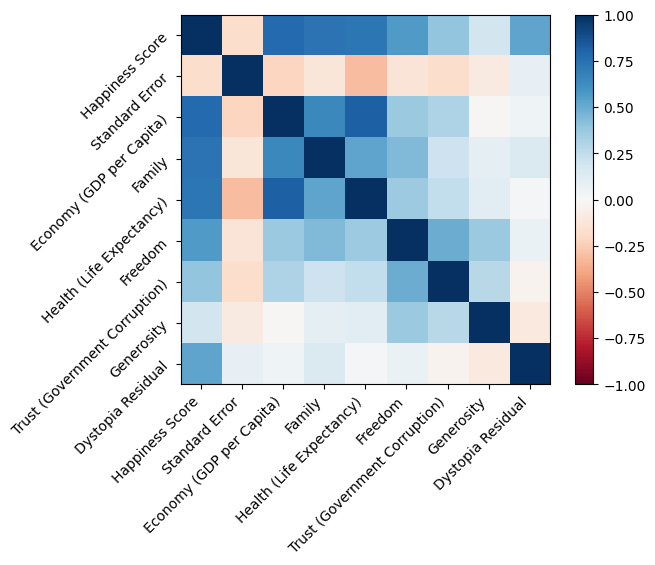

In [27]:
import matplotlib.pyplot as pl
import numpy as np

corr_matrix = happiness[['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family',
                         'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                         'Generosity', 'Dystopia Residual']].corr()

#correlation matrix with clim and cmap
pl.imshow(corr_matrix, clim=(-1, 1), cmap="RdBu", interpolation='none')

pl.colorbar()
tick_positions = np.arange(len(corr_matrix.columns))

pl.xticks(tick_positions, ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family',
                           'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                           'Generosity', 'Dystopia Residual'], rotation=45, ha='right')

pl.yticks(tick_positions, ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family',
                           'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                           'Generosity', 'Dystopia Residual'], rotation=45)

pl.show();


In the heatmap diagram, we can see that varaibles have a strong positive correlation with themselves. This is shown with our diagonal being completely deep blue. The color bar by the left indicates the direction and strength of the correlations. Dark blue indicates a strong positive correlation of 1 while dark red indicates a strong negative correlation of -1.

In [28]:
GenerosityByRegion = happiness.groupby("Region").max().sort_values(by="Generosity", ascending=False)
GenerosityByRegion

,Country,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Region,,,,,,,,,,,
Southeastern Asia,Vietnam,6.798,0.06698,1.52186,1.26504,1.02525,0.66246,0.49210,0.79588,2.31945,2015
Western Europe,United Kingdom,7.587,0.05635,1.56391,1.40223,0.95562,0.66973,0.48357,0.51912,2.70201,2015
Sub-Saharan Africa,Zimbabwe,5.477,0.11068,1.06024,1.18468,0.70950,0.59201,0.55191,0.50318,3.05137,2015
Southern Asia,Sri Lanka,5.253,0.03751,0.83524,1.10395,0.70806,0.53726,0.15445,0.47998,3.10709,2015
Australia and New Zealand,New Zealand,7.286,0.04083,1.33358,1.31967,0.93156,0.65124,0.42922,0.47501,2.26646,2015
Middle East and Northern Africa,Yemen,7.278,0.07832,1.69042,1.22393,0.91387,0.64157,0.52208,0.47179,3.08854,2015
Latin America and Caribbean,Venezuela,7.226,0.13693,1.21183,1.30477,0.86027,0.63376,0.24558,0.46187,3.60214,2015
North America,United States,7.427,0.03839,1.39451,1.32261,0.90563,0.63297,0.32957,0.45811,2.51011,2015
Eastern Asia,Taiwan,6.298,0.05051,1.38604,1.30060,1.01328,0.59608,0.37124,0.39478,2.32323,2015


In [29]:
top_region = GenerosityByRegion.index[0]
print(f"The most generous region is {top_region}")

The most generous region is Southeastern Asia


In [39]:
from scipy import stats

generosity_data = happiness["Generosity"].dropna()
ks_test_self = stats.ks_2samp(generosity_data, generosity_data)
print("K-S Test for Generosity with itself:", ks_test_self)



K-S Test for Generosity with itself: KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0, statistic_sign=1)


This is the KS-Test for generosity. The p-value is equal to 1 because we are comparing the same variable to itself.

In [40]:
correlation_matrix = happiness[['Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year' ]].corr()


# Find the two most correlated variables
most_correlated = correlation_matrix.abs().unstack().sort_values(ascending=False)
most_correlated = most_correlated[most_correlated != 1].index[0]  # The two most correlated columns

print("The two most correlated columns are:", most_correlated)

The two most correlated columns are: ('Health (Life Expectancy)', 'Economy (GDP per Capita)')


In [32]:
p_value = 0.05

Setting my treshhold


In [41]:
sample1 = happiness["Health (Life Expectancy)"]
sample2 = happiness["Economy (GDP per Capita)"]



In [42]:
import scipy.stats as stats
stats.ks_2samp(sample1, sample2)


KstestResult(statistic=0.4430379746835443, pvalue=2.5141179920683087e-14, statistic_location=0.95562, statistic_sign=1)

My p-value is way less than the threshold set which was p-value= 0.05 this makes me reject the null hypotheses. Thus, my null hypotheses becomes insignificant.